In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df=pd.read_csv("airline_satisfaction.csv")
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [4]:
df1=df.drop(['Customer Type','Flight Distance'],axis=1)

In [5]:
Ar=df1['Arrival Delay in Minutes']
q1=Ar.quantile(0.25)
q3=Ar.quantile(0.75)
iqr=q3-q1
high=q3+1.5*iqr
low=q1-1.5*iqr
df1=df1[(Ar>=low) & (Ar<=high)]

In [6]:
De=df1['Departure Delay in Minutes']
q1=De.quantile(0.25)
q3=De.quantile(0.75)
iqr=q3-q1
high=q3+1.5*iqr
low=q1-1.5*iqr
df1=df1[(De>=low) & (De<=high)]

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96286 entries, 0 to 129482
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       96286 non-null  object 
 1   Age                                96286 non-null  int64  
 2   Type of Travel                     96286 non-null  object 
 3   Class                              96286 non-null  object 
 4   Seat comfort                       96286 non-null  int64  
 5   Departure/Arrival time convenient  96286 non-null  int64  
 6   Food and drink                     96286 non-null  int64  
 7   Gate location                      96286 non-null  int64  
 8   Inflight wifi service              96286 non-null  int64  
 9   Inflight entertainment             96286 non-null  int64  
 10  Online support                     96286 non-null  int64  
 11  Ease of Online booking             96286 non-null  in

In [8]:
df2=df1.drop(['Type of Travel'],axis=1)

In [9]:
df2=pd.get_dummies(df2,columns=['satisfaction'],dtype=int)
df2=df2.drop(['satisfaction_dissatisfied'],axis=1)
df2.rename(columns={'satisfaction_satisfied':'satisfaction'},inplace=True)
df2

,Age,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,65,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1
2,15,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1
3,60,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1
4,70,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1
5,30,Eco,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129477,55,Eco,5,2,5,4,1,5,5,1,1,1,3,3,4,1,0,0.0,1
129479,35,Eco,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.0,1
129480,69,Eco,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.0,1
129481,11,Eco,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0,1


In [10]:
df2=pd.get_dummies(df2,columns=['Class'],dtype=int)
df2

,Age,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,65,0,0,0,2,2,4,2,3,3,...,3,5,3,2,0,0.0,1,0,1,0
2,15,0,0,0,3,2,0,2,2,3,...,4,4,4,2,0,0.0,1,0,1,0
3,60,0,0,0,3,3,4,3,1,1,...,1,4,1,3,0,0.0,1,0,1,0
4,70,0,0,0,3,4,3,4,2,2,...,2,4,2,5,0,0.0,1,0,1,0
5,30,0,0,0,3,2,0,2,2,5,...,5,5,4,2,0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129477,55,5,2,5,4,1,5,5,1,1,...,3,3,4,1,0,0.0,1,0,1,0
129479,35,5,4,5,3,2,5,2,2,4,...,4,4,3,2,9,0.0,1,0,1,0
129480,69,5,4,5,3,4,5,4,4,5,...,4,3,4,4,4,0.0,1,0,1,0
129481,11,5,5,5,2,2,5,2,2,3,...,3,5,4,2,5,0.0,1,0,1,0


<AxesSubplot:>

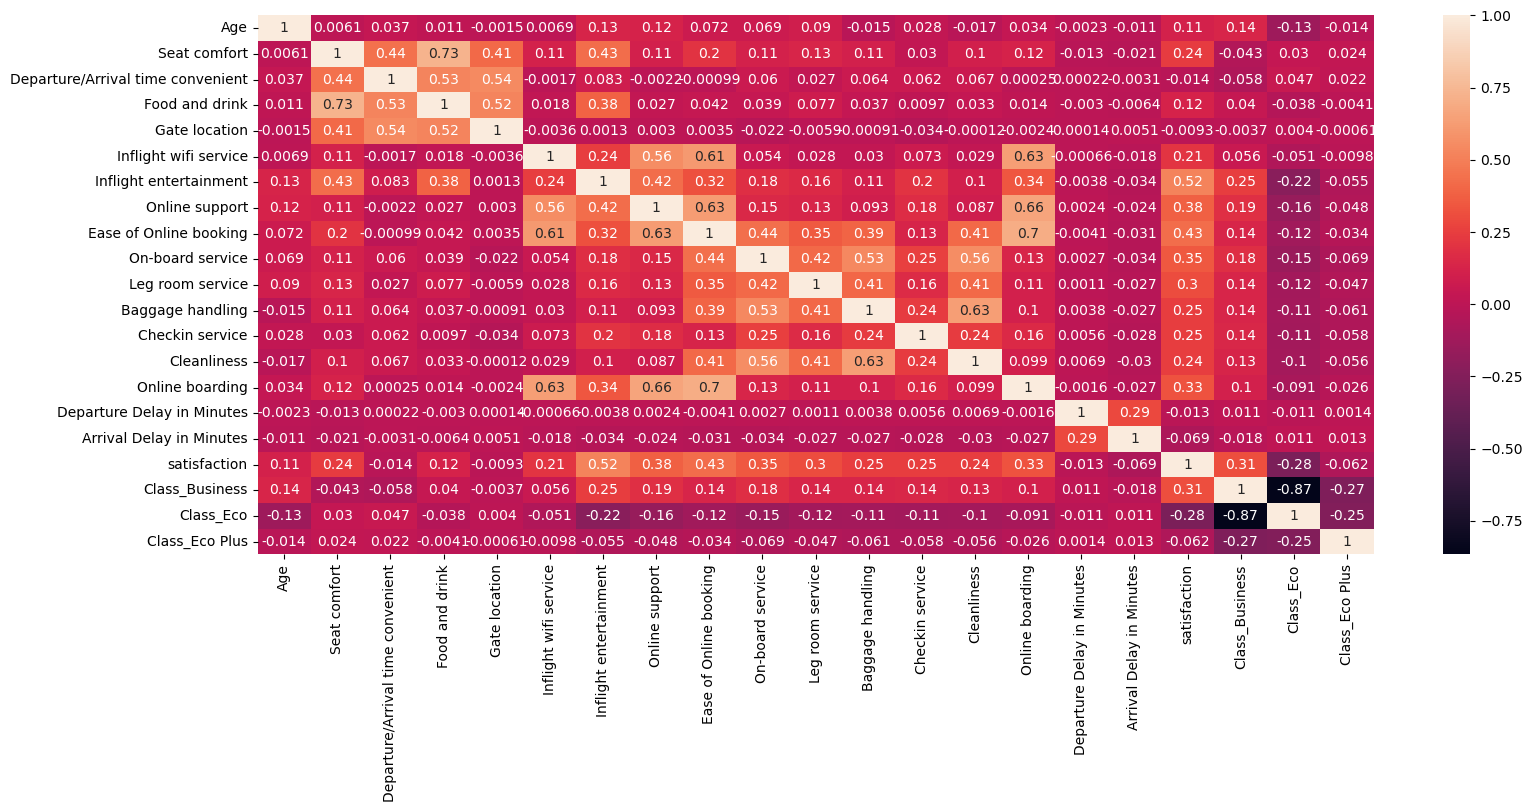

In [11]:
corr_df=df2.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr_df,annot=True)

In [12]:
LogR=LogisticRegression(max_iter=1000)

In [24]:
X=df2.drop(['satisfaction'],axis=1)
y=df2['satisfaction']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2143)
LogR.fit(X_train,y_train)
LogR.score(X_test,y_test)

0.8242808183612005